# Imports

In [3]:
from dataset import MyData
from model import Net
from config import device
from helper import downscale_map

import torch
import numpy as np
import matplotlib.pyplot as plt

# Map cascade

#### Get image

In [5]:
dataset1 = MyData(path_to_file='../imgs/2.png', mode='img', mode_3d='cylinder', radius=5, reduce_fctor=1, need_help=False)
# dataset2 = MyData(path_to_file='./data/sn1996k1905eng.abz', mode='abz', mode_3d='sphere', radius=2, reduce_fctor=1, need_help=False)

dataset_list = [dataset1] #, dataset2]

#### Get map cascades from images

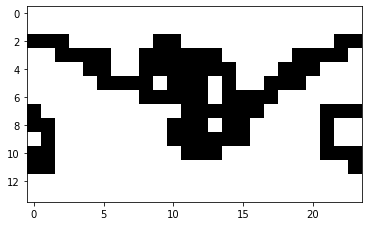

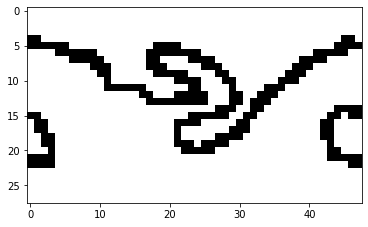

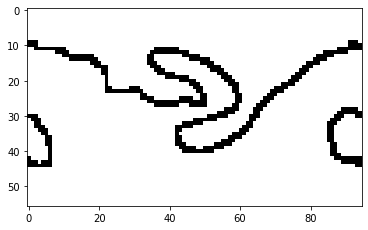

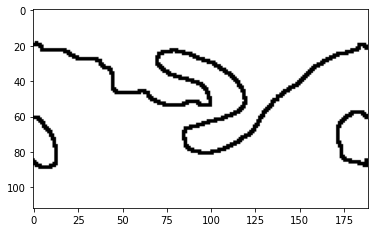

In [6]:
normal_img_array_1 = 1 - np.array(dataset1.img_array, dtype='float64') / 255.
map_cascade_1 = [downscale_map(normal_img_array_1, 2 ** x) for x in range(4, 0, -1)]

# convolve = np.vectorize(np.convolve, signature='(n),(m)->(k)')
# map_cascade = [(1 - convolve(convolve(normal_img_array, np.ones((i))).T, np.ones((i))).T) > 0 for i in range(200, 0, -50)]

for cas_map in map_cascade_1:
    plt.imshow(cas_map, cmap = "gray")
    plt.show()

####  Training the model

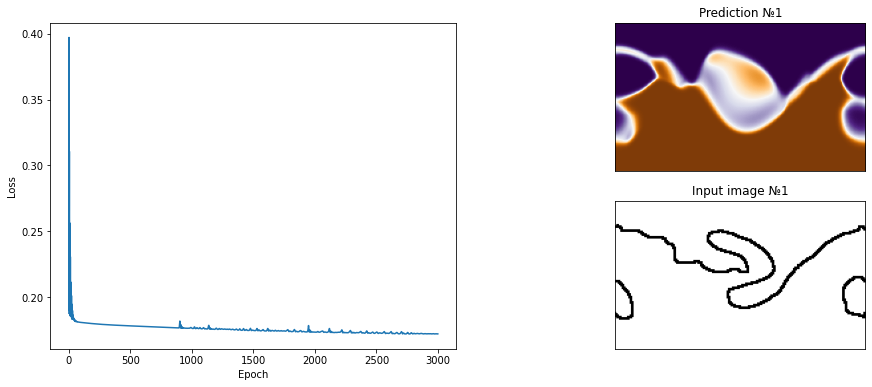

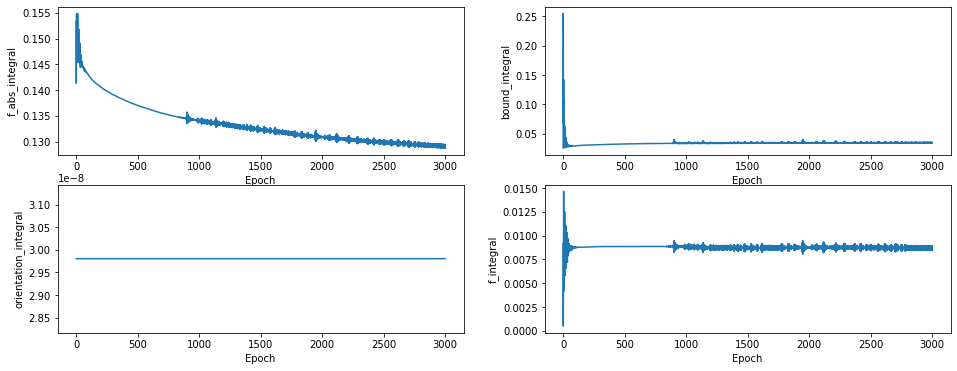

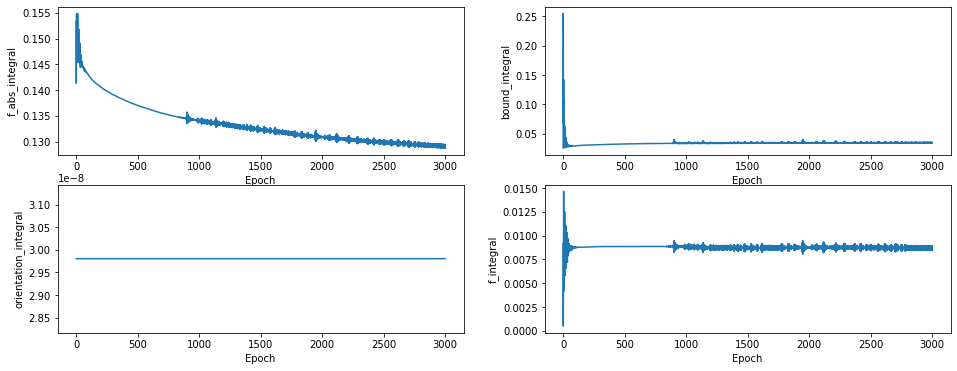

In [7]:
# for i, cas_map in enumerate(zip(map_cascade_1, map_cascade_2)):
#     dataset1 = MyData(path_to_file=255 * cas_map[0], mode='2img', mode_3d='cylinder', radius=5, reduce_fctor=1, need_help=False)
#     dataset2 = MyData(path_to_file=255 * cas_map[1], mode='2img', mode_3d='cylinder', radius=2, reduce_fctor=1, need_help=False)

#     dataset_list = [dataset1, dataset2]
#     model = Net(dataset_list=dataset_list, lr=1e-3)
#     model.to(device)
#     # summary(model, input_size=(sum([len(x) for x in model.data_list]), 3))
#     if i:
#         model.load_state_dict(torch.load(f'./state_dcit/{i - 1}_cascade_1904.pt'))
#     _ = model.test_model(model.data_list, need_plot=True)
#     # dataset1.show_image()
#     model.start_training(num_epochs=3e+3, my_weight=0.1)
#     model.show_loss_items()
#     model.save_state_dict(f'./state_dcit/{i}_cascade_1904.pt')
#     input()

for i, cas_map in enumerate(map_cascade_1):
    dataset1 = MyData(path_to_file=255 * cas_map, mode='2img', mode_3d='cylinder', radius=5, reduce_fctor=1, need_help=False)

    dataset_list = [dataset1]
    model = Net(dataset_list=dataset_list, lr=1e-3)
    model.to(device)
    # summary(model, input_size=(sum([len(x) for x in model.data_list]), 3))
    if i:
        model.load_state_dict(torch.load(f'./state_dict/{i}_cascade_1904.pt'))
    _ = model.test_model(model.data_list, need_plot=True)
    # dataset1.show_image()
    model.start_training(num_epochs=3e+3, my_weight=0.1, need_plot=True, need_save=False)
    model.show_loss_items()
    model.save_state_dict(f'./state_dict/{i+1}_cascade_1904.pt')
    # input()